In [1]:
import pandas as pd 
import numpy as np 


In [2]:
# generate a random dataframe with
# 2 columns and 100 rows
df = pd.DataFrame( np.random.rand(100, 2), columns=[f"f_{i}" for i in range(1, 3)] )
df

,f_1,f_2
0,0.903637,0.949288
1,0.931835,0.468538
2,0.680024,0.428681
3,0.335915,0.589400
4,0.129396,0.162385
...,...,...
95,0.593306,0.370930
96,0.956047,0.738303
97,0.951313,0.279319
98,0.252538,0.109248


In [3]:
from sklearn import preprocessing
# initialize polynomial features class object
# for two-degree polynomial features
pf = preprocessing.PolynomialFeatures( degree=2, interaction_only=False, include_bias=False )
# fit to the features
pf.fit(df)
# create polynomial features
poly_feats = pf.transform(df)
# create a dataframe with all the features
num_feats = poly_feats.shape[1]
df_transformed = pd.DataFrame( poly_feats, columns=[f"f_{i}" for i in range(1, num_feats + 1)] )
df_transformed

,f_1,f_2,f_3,f_4,f_5
0,0.903637,0.949288,0.816561,0.857812,0.901148
1,0.931835,0.468538,0.868317,0.436601,0.219528
2,0.680024,0.428681,0.462433,0.291513,0.183767
3,0.335915,0.589400,0.112839,0.197988,0.347392
4,0.129396,0.162385,0.016743,0.021012,0.026369
...,...,...,...,...,...
95,0.593306,0.370930,0.352012,0.220075,0.137589
96,0.956047,0.738303,0.914027,0.705853,0.545092
97,0.951313,0.279319,0.904997,0.265719,0.078019
98,0.252538,0.109248,0.063776,0.027589,0.011935


In [6]:
#using bins
# create bins of the numerical columns
# 10 bins
df["f_bin_10"] = pd.cut(df["f_1"], bins=10, labels=False)
# 100 bins
df["f_bin_100"] = pd.cut(df["f_1"], bins=100, labels=False)
df


,f_1,f_2,f_bin_10,f_bin_100
0,0.903637,0.949288,9,91
1,0.931835,0.468538,9,94
2,0.680024,0.428681,6,68
3,0.335915,0.589400,3,33
4,0.129396,0.162385,1,12
...,...,...,...,...
95,0.593306,0.370930,5,59
96,0.956047,0.738303,9,96
97,0.951313,0.279319,9,96
98,0.252538,0.109248,2,25


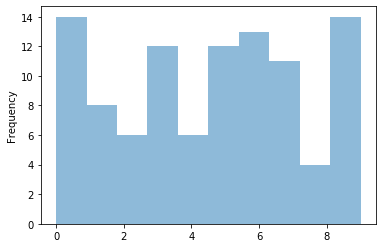

In [12]:
ax = df['f_bin_10'].plot.hist(bins=10, alpha=0.5)
ax

In [13]:
#Handling missing values using k neighbours:
import numpy as np 
from sklearn import impute

X = np.random.randint(1,15,(10,6))
X = X.astype(float)
X



array([[ 6.,  5.,  8., 11.,  3.,  5.],
       [ 8., 13., 12.,  7.,  5.,  3.],
       [10., 14.,  8.,  4.,  1.,  2.],
       [ 1., 11.,  4.,  9.,  2., 13.],
       [ 5.,  8., 12.,  2.,  7.,  8.],
       [ 4.,  1.,  2.,  4.,  9., 14.],
       [14., 10., 13.,  2.,  2.,  3.],
       [ 9., 11., 10.,  8., 14., 12.],
       [ 2., 13.,  2.,  1.,  9.,  5.],
       [ 3.,  4.,  9.,  3.,  9., 14.]])

In [14]:
# randomly assign 10 elements to NaN (missing)
X.ravel()[np.random.choice(X.size, 10, replace = False)] = np.nan
X

array([[ 6., nan,  8., 11., nan,  5.],
       [ 8., 13., nan,  7.,  5.,  3.],
       [10., 14.,  8.,  4.,  1.,  2.],
       [nan, 11., nan,  9.,  2., 13.],
       [ 5.,  8., 12.,  2.,  7.,  8.],
       [ 4.,  1.,  2.,  4., nan, nan],
       [14., nan, 13.,  2.,  2., nan],
       [ 9., 11., 10., nan, 14., 12.],
       [ 2., 13.,  2.,  1.,  9.,  5.],
       [ 3.,  4.,  9.,  3.,  9., 14.]])

In [16]:
#use 2 nearest neighbours to fill na values
knn_imputer = impute.KNNImputer(n_neighbors=2)
Y = knn_imputer.fit_transform(X)
Y

array([[ 6. , 13.5,  8. , 11. ,  3. ,  5. ],
       [ 8. , 13. ,  8. ,  7. ,  5. ,  3. ],
       [10. , 14. ,  8. ,  4. ,  1. ,  2. ],
       [ 9.5, 11. , 12.5,  9. ,  2. , 13. ],
       [ 5. ,  8. , 12. ,  2. ,  7. ,  8. ],
       [ 4. ,  1. ,  2. ,  4. ,  8. ,  9.5],
       [14. , 13.5, 13. ,  2. ,  2. ,  2.5],
       [ 9. , 11. , 10. ,  6.5, 14. , 12. ],
       [ 2. , 13. ,  2. ,  1. ,  9. ,  5. ],
       [ 3. ,  4. ,  9. ,  3. ,  9. , 14. ]])